# Predicting Car Prices with K-Nearest Neighbours

## Author: Salvatore Porcheddu
## Date: 2021/08/19

# Step 1: Introduction to the Data Set

In this project, we will try to predict car prices based on characteristics the cars possess using a K-Nearest Neighbours Regressor model.

The cars dataset used in what follows comes from the UCI Machine Learning Repository and can be found [here](https://archive.ics.uci.edu/ml/datasets/automobile). A description of the dataset columns can be found on the same page.

In [86]:
# importing relevant packages and the data

import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

cars = pd.read_csv("imports-85.data", names=["symboling", "normalized_losses", "make", "fuel_type", "aspiration",
                                            "num_doors", "body_style", "drive_wheels", "engine_location", "wheel_base",
                                            "length", "width", "height", "curb_weight", "engine_type", "num_cylinders",
                                            "engine_size", "fuel_system", "bore", "stroke", "compression_ratio", "horsepower",
                                            "peak_rpm", "city_mpg", "highway_mpg", "price"])
cars.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


# Step 2: Data Cleaning

In [87]:
# Replacing missing values, represented with "?", with np.nan
cars = cars.replace("?", np.nan)

# Converting "object" type columns to numeric where appropriate
cars = cars.astype({"normalized_losses": float, "bore": float, "stroke": float, 
                    "horsepower": float, "peak_rpm": float, "price": float})

# Checking how many missing values there are
print(cars.info())

print(cars.normalized_losses.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized_losses  164 non-null    float64
 2   make               205 non-null    object 
 3   fuel_type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num_doors          203 non-null    object 
 6   body_style         205 non-null    object 
 7   drive_wheels       205 non-null    object 
 8   engine_location    205 non-null    object 
 9   wheel_base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb_weight        205 non-null    int64  
 14  engine_type        205 non-null    object 
 15  num_cylinders      205 non-null    object 
 16  engine_size        205 non

In [88]:
# Dropping rows with missing values for the price column
cars = cars.dropna(subset=["price"])

cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized_losses  164 non-null    float64
 2   make               201 non-null    object 
 3   fuel_type          201 non-null    object 
 4   aspiration         201 non-null    object 
 5   num_doors          199 non-null    object 
 6   body_style         201 non-null    object 
 7   drive_wheels       201 non-null    object 
 8   engine_location    201 non-null    object 
 9   wheel_base         201 non-null    float64
 10  length             201 non-null    float64
 11  width              201 non-null    float64
 12  height             201 non-null    float64
 13  curb_weight        201 non-null    int64  
 14  engine_type        201 non-null    object 
 15  num_cylinders      201 non-null    object 
 16  engine_size        201 non

In [89]:
# Imputing remaining missing values in numeric columns with the column mean

columns = ["bore", "stroke", "horsepower", "peak_rpm", "normalized_losses"]

for column in columns:
    cars[column] = cars[column].fillna(cars[column].mean())
    
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized_losses  201 non-null    float64
 2   make               201 non-null    object 
 3   fuel_type          201 non-null    object 
 4   aspiration         201 non-null    object 
 5   num_doors          199 non-null    object 
 6   body_style         201 non-null    object 
 7   drive_wheels       201 non-null    object 
 8   engine_location    201 non-null    object 
 9   wheel_base         201 non-null    float64
 10  length             201 non-null    float64
 11  width              201 non-null    float64
 12  height             201 non-null    float64
 13  curb_weight        201 non-null    int64  
 14  engine_type        201 non-null    object 
 15  num_cylinders      201 non-null    object 
 16  engine_size        201 non

In [90]:
# Normalizing numeric feature columns so that they all range from 0 to 1

cars_x = cars.loc[:, "symboling":"highway_mpg"].copy()
cars_numeric = cars_x.select_dtypes("number").columns

for column in cars_numeric:
    cars_x[column] = (cars_x[column] - cars_x[column].min()) / (cars_x[column].max() - cars_x[column].min())
    
cars = pd.concat([cars_x, cars["price"]], axis=1)
    
print(cars.head())
print("\n")
print(cars.describe())

   symboling  normalized_losses         make fuel_type aspiration num_doors  \
0        1.0           0.298429  alfa-romero       gas        std       two   
1        1.0           0.298429  alfa-romero       gas        std       two   
2        0.6           0.298429  alfa-romero       gas        std       two   
3        0.8           0.518325         audi       gas        std      four   
4        0.8           0.518325         audi       gas        std      four   

    body_style drive_wheels engine_location  wheel_base  ...  engine_size  \
0  convertible          rwd           front    0.058309  ...     0.260377   
1  convertible          rwd           front    0.058309  ...     0.260377   
2    hatchback          rwd           front    0.230321  ...     0.343396   
3        sedan          fwd           front    0.384840  ...     0.181132   
4        sedan          4wd           front    0.373178  ...     0.283019   

   fuel_system      bore    stroke compression_ratio horsepowe

# Step 3: Univariate Model

We will now proceed to train K-nearest neighbors models, starting by using a single feature column at a time; in this simple project, **we will deliberately only use the numeric features to train the model**, knowing that this will probably damage model performance.

In [91]:
def knn_train_test(x, y, df):
    """This function splits a dataframe into train and test set (75% and 25% of the rows, respectively; shuffling is applied 
    to the dataframe before splitting), then trains a univariate or multivariate K-nearest neighbors regressor with default k 
    number, predicts values for the test set and scores the predictions against the true values using the Root Mean Squared 
    Error metric.
    
    Parameters:
    x: feature column(s) as string (to train an univariate model) or list of strings (to train a multivariate model)
    y: target column as string
    df: dataframe to use for the machine learning workflow
    
    Returns:
    RMSE value
    """
    np.random.seed(26)
    permuted = df.loc[np.random.permutation(df.index)].copy()
    permuted.reset_index(inplace=True)
    
    if not isinstance(x, list):    # checks if x is a list, if it isn't, converts it to a list
        x = [x]
    
    train_length = int(permuted.shape[0] * 0.75)    # training set will contain roughly 75% of the df rows
    X_train = permuted.loc[:train_length, x].copy()    
    X_test = permuted.loc[train_length:, x].copy()
    y_train = permuted.loc[:train_length, y].copy()
    y_test = permuted.loc[train_length:, y].copy()
    
    knn = KNeighborsRegressor()    
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    mse = mean_squared_error(y_test, pred)
    
    return mse ** (1/2)

Now let's proceed and train a model for each of the numeric columns separately; which feature column will yield the best model performance?

In [92]:
rmses = {}

for column in cars_numeric:
    rmse = knn_train_test(column, "price", cars)
    rmses[column] = rmse
    
rmses

{'symboling': 7783.331871201106,
 'normalized_losses': 6690.518041374733,
 'wheel_base': 4244.016668666792,
 'length': 4680.0733128160855,
 'width': 3596.9632564477624,
 'height': 7669.281238198808,
 'curb_weight': 3284.0975447049764,
 'engine_size': 2899.1966418032316,
 'bore': 7028.8331356927065,
 'stroke': 6360.986697786104,
 'compression_ratio': 4823.217034629196,
 'horsepower': 4307.490326596856,
 'peak_rpm': 6533.141837929879,
 'city_mpg': 5798.611841656249,
 'highway_mpg': 3928.5712080183284}

The ``engine_size`` column has the lowest RMSE and therefore the best generalization performance among the single numeric columns. 
Let's continue training and testing univariate models, but this time for different k values (we will train a separate model for every feature column AND every k value). Let's also plot the results onto a scatter plot.

In [93]:
def knn_train_test_optimize_plot(x, y, df, k_list):
    """This function splits a dataframe into train and test set (75% and 25% of the rows, respectively; shuffling is applied 
    to the dataframe before splitting), then trains a univariate or multivariate K-nearest neighbors regressor for every number 
    of neighbors provided in the k_list parameter, predicts values for the test set, scores the predictions against the true 
    values using the Root Mean Squared Error metric and finally plots the results onto a scatter plot.
    
    Parameters:
    x: feature column(s) as string (to train an univariate model) or list of strings (to train a multivariate model)
    y: target column as string
    df: dataframe to use for the machine learning workflow
    k_list: list of values to try for the n_neighbors parameter of the KNeighborsRegressor
    
    Returns:
    -
    """
    np.random.seed(26)
    permuted = df.loc[np.random.permutation(df.index)].copy()
    permuted.reset_index(inplace=True)
    
    if not isinstance(x, list):    # checks if x is a list, if it isn't, converts it to a list
        x = [x]
    
    train_length = int(permuted.shape[0] * 0.75)    # training set will contain roughly 75% of the df rows
    X_train = permuted.loc[:train_length, x].copy()    
    X_test = permuted.loc[train_length:, x].copy()
    y_train = permuted.loc[:train_length, y].copy()
    y_test = permuted.loc[train_length:, y].copy()
    
    rmses = []
    
    for k in k_list:
        knn = KNeighborsRegressor(n_neighbors=k)    
        knn.fit(X_train, y_train)
        pred = knn.predict(X_test)
        mse = mean_squared_error(y_test, pred)
        rmses.append(mse ** (1 / 2))
    
    plt.scatter(k_list, rmses)
    plt.title(f"RMSE value for every number of neighbors for the {x} feature(s)")
    plt.xlabel("Number of neighbors")
    plt.ylabel("RMSE")
    plt.show()

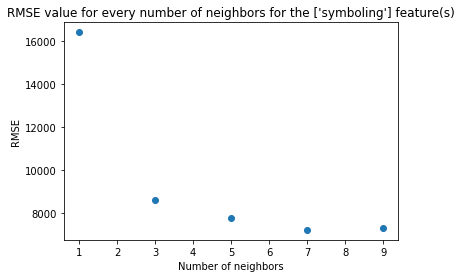

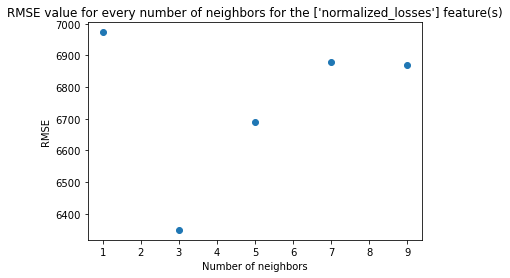

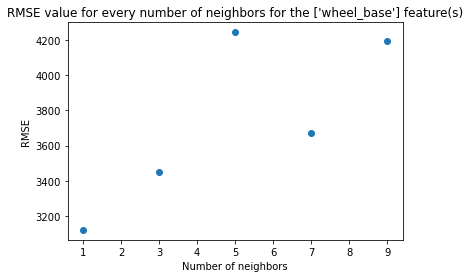

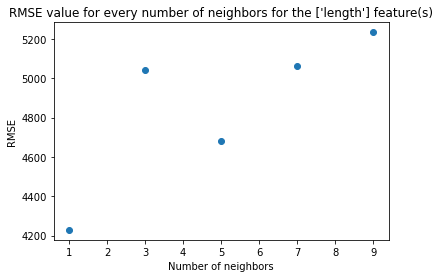

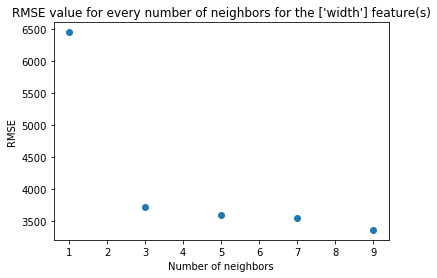

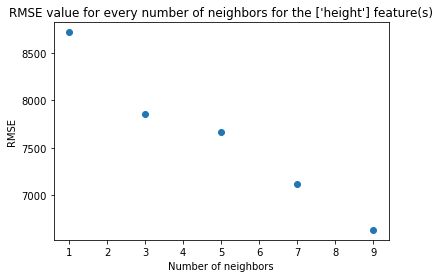

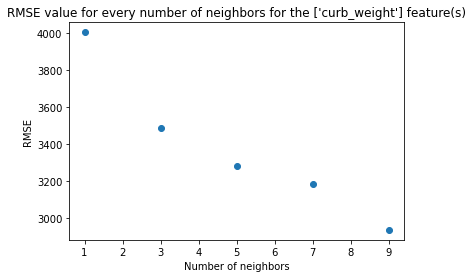

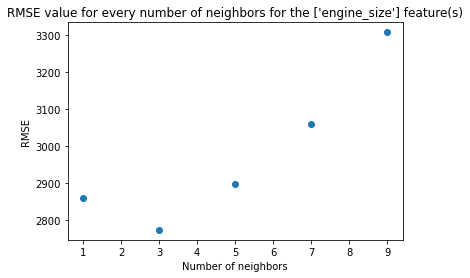

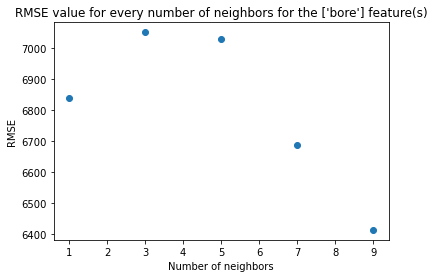

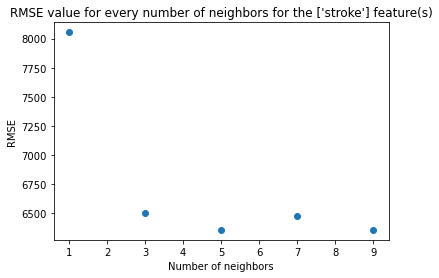

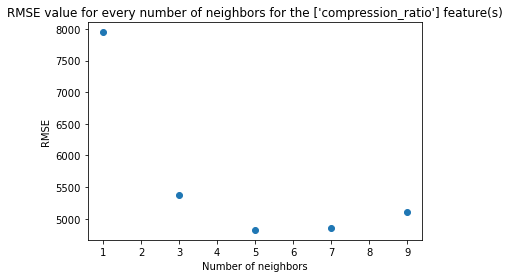

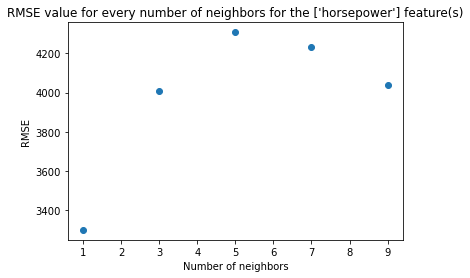

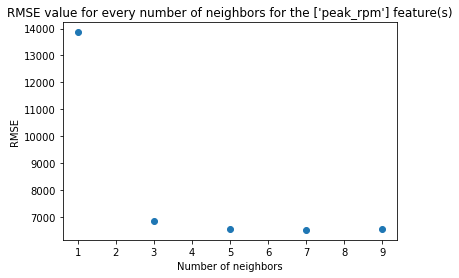

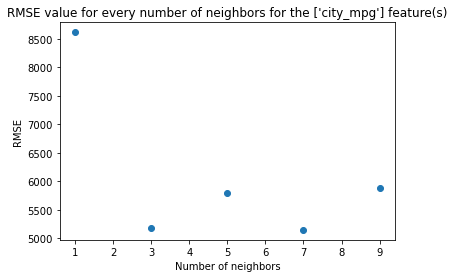

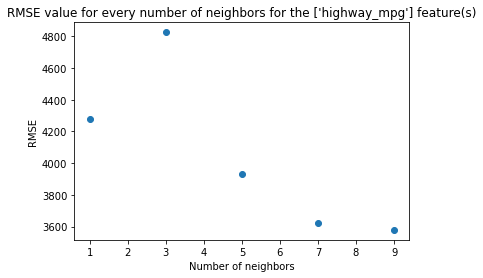

In [94]:
k_list = [1, 3, 5, 7, 9]

for column in cars_numeric:
    knn_train_test_optimize_plot(column, "price", cars, k_list)

Depending on the feature column used to train the model, the optimal number of neighbors to use changes.

# Step 4: Multivariate Model

In this step we will start using more feature columns at a time to fit the model; we will first train a model with the two best features from the previous step (with default n_neighbors value), then train a model with the three best features, then with the four best features and finally with the five best features.

In [95]:
rmses = {}

two_features = ["engine_size", "curb_weight"]
three_features = two_features + ["width"]
four_features = three_features + ["highway_mpg"]
five_features = four_features + ["wheel_base"]

features = [two_features, three_features, four_features, five_features]
i = 2

for feature_list in features:
    rmses[f"{i}_features"] = knn_train_test(feature_list, "price", cars)
    i += 1
    
rmses

{'2_features': 2640.80973336648,
 '3_features': 2551.313058169129,
 '4_features': 2792.764640504978,
 '5_features': 2767.8472501205697}

The model with three features performed better than the others with default ``n_neighbors`` value.

# Step 5: Hyperparameter tuning

Finally, let's take the top three best models from the previous step (which are those with 2, 3 and 5 features) and optimize the ``n_neighbors`` hyperparameter (between 1 and 25) for each of them.

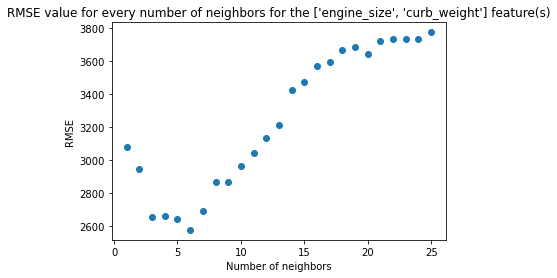

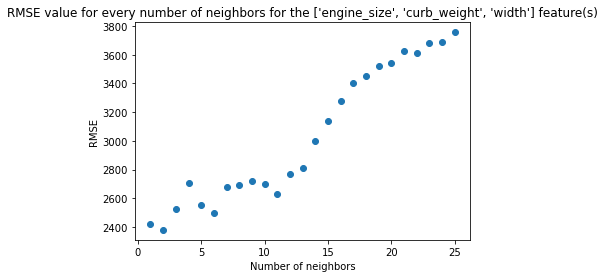

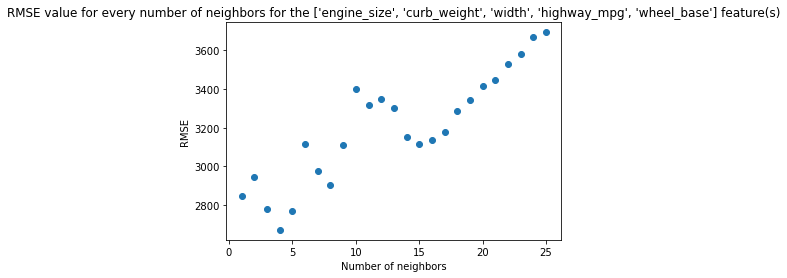

In [96]:
k_values = range(1, 26)
new_features = [two_features, three_features, five_features]

for features in new_features:
    knn_train_test_optimize_plot(features, "price", cars, k_values)


A fairly low number of neighbors seems ideal for all of our models: six is ideal for the model with two features, two is ideal for the model with three features and four is ideal for the model with five features.